### 一.基本原理：低维空间样本间距离与原始空间一致
多维缩放（Multiple Dimensional Scaling,MDS）的基本思想很简单：降维后低维空间中样本间的**欧式距离**与原始空间中的距离保持一致，如下图所示，将三维空间数据压缩到二维空间，而不改变它们彼此之间的距离。
![avatar](./source/19_mds.png)
我们不妨设原始空间样本集为$X\in R^{m\times n}$，样本张成的距离矩阵为$D\in R^{m\times m}$,$D_{ij}$表示样本$x_i$与样本$x_j$之间的距离，降维后的样本集为$Z\in R^{m\times d}(d<<n)$，所以我们的目的是让如下关系式成立：   

$$
\left|\left|z_i-z_j\right|\right|=D_{ij}
$$  

为了方便处理，我们令$B=Z^TZ$(即$B_{ij}=z_i^Tz_j$)，那么上面的关系式可以等价为如下关系：   

$$
D_{ij}^2=\left|\left|z_i\right|\right|^2+\left|\left|z_j\right|\right|^2-2z_i^Tz_j=B_{ii}+B_{jj}-2B_{ij}
$$  

所以，我们的目标便是由$D$矩阵推导出$B$矩阵，然后再对$B$矩阵做正交分解得到$Z$，为了便于处理，我们假设$Z$被去中心化了，即$\sum_{i=1}^mz_i=0$，那么有：   

$$
\sum_{i=1}^mB_{ij}=\sum_{j=1}^mB_{ij}=0
$$  

进一步地，有如下关系成立：   

$$
\sum_{i=1}^mD_{ij}^2=tr(B)+mB_{jj}(关系1)\\
\sum_{j=1}^mD_{ij}^2=tr(B)+mB_{ii}(关系2)\\
\sum_{i=1}^m\sum_{j=1}^mD_{ij}^2=2mtr(B)(关系3)\\
$$  

其中，$tr(B)=\sum_{i=1}^mz_i^Tz_i$，通过关系1,2,3，我们可以得到$B$关于$D$表达式，为了进一步简化，我们可以令：   

$$
D_{i\cdot}^2=\frac{1}{m}\sum_{j=1}^mD_{ij}^2\\
D_{\cdot j}^2=\frac{1}{m}\sum_{i=1}^mD_{ij}^2\\
D_{\cdot \cdot}^2=\frac{1}{m^2}\sum_{i=1}^m\sum_{j=1}^mD_{ij}^2
$$  

最后：   


$$
B_{ij}=-\frac{1}{2}(D_{ij}^2-D_{i\cdot}^2-D_{\cdot j}^2+D_{\cdot \cdot}^2)
$$  

最后求$Z$就比较简单了，我们对$B$做特征分解$B=V\Lambda V^T$，其中$\Lambda=diag(\lambda_1,\lambda_2,...,\lambda_n),\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_n$，而：  

$$
Z=V\Lambda^{1/2}
$$  

与PCA,LDA类似地，我们通常只取$\Lambda$中特征值较大的前几个，对应的$V$也只取前几列

### 二.代码实现

我们先造一个伪数据

In [40]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [41]:
n = 200
r = np.linspace(0,1,n)
l = np.linspace(0,1,n)

t = (3 * np.pi) / 2 * ( 1 + 2 * r )
x =  t * np.cos(t)
y = 10 * l
z =t * np.sin(t)

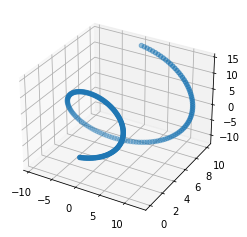

In [42]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x,y,z, cmap='Blues')
plt.show()

In [43]:
data=np.c_[x,y,z]

构建原始距离矩阵$D$，这里就用构建欧氏距离

In [44]:
m=data.shape[0]
D=np.zeros(shape=(m,m))

In [45]:
# 计算在原始空间的距离
for i in range(0,m):
    for j in range(i,m):
        D[i,j]=np.sqrt(np.sum(np.power(data[i]-data[j],2)))
        D[j,i]=D[i,j]

In [46]:
D_i=np.sum(np.power(D,2),axis=0)/m
D_j=np.sum(np.power(D,2),axis=1)/m
D_2=np.sum(np.power(D,2))/(m*m)

计算$B$矩阵

In [47]:
B=np.zeros(shape=(m,m))
for i in range(0,m):
    for j in range(i,m):
        B[i,j]=-0.5*(D[i,j]*D[i,j]-D_i[i]-D_j[j]+D_2)
        B[j,i]=B[i,j]

对$B$进行特征分解，求Z

In [48]:
eig_vals,eig_vecs=np.linalg.eig(B)

In [49]:
sorted_indice=np.argsort(-1*np.abs(eig_vals))
eig_vals=eig_vals[sorted_indice]
eig_vecs[:]=eig_vecs[:,sorted_indice]

保留前两维

In [50]:
n_compnent=2
Lambda=np.diag(eig_vals.real[:n_compnent])
vecs=eig_vecs.real[:,:n_compnent]

In [51]:
new_data=vecs.dot(np.sqrt(Lambda))

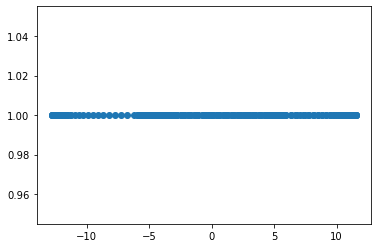

In [53]:
plt.scatter(new_data[:,0],new_data[:,1])

结果看起来还不错，同样地，将代码封装到`ml_models.decomposition.MDS`中